In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from c_an_utilis import *

data_path = './../../../data'

In [2]:
rb_dir = os.path.join(data_path, 'RateBeer')
rev_with_scores_rb = pd.read_pickle(os.path.join(rb_dir, 'rev_w_scores.pkl'))
rev_with_scores_rb['date'] = pd.to_datetime(rev_with_scores_rb['date'])
beers_rb = pd.read_csv(os.path.join(rb_dir, 'beers_RB_clean.csv'))
users_rb = pd.read_csv(os.path.join(rb_dir, 'users_RB_clean.csv'))
rev_with_scores_rb.columns = ['aroma_rt' if i == 10 else col for i, col in enumerate(rev_with_scores_rb.columns)]
rev_with_scores_rb.columns = ['appearance_rt' if i == 9 else col for i, col in enumerate(rev_with_scores_rb.columns)]

In [3]:
rev_with_scores_rb.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance_rt', 'aroma_rt', 'palate',
       'taste', 'overall', 'rating', 'review', 'lang_tag', 'stems', 'flavor',
       'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment',
       'off_flavors', 'miscellaneous', 'expertness_score'],
      dtype='object')

In [4]:
complete_beer = pd.merge(beers_rb, rev_with_scores_rb, on='beer_id')

In [5]:
complete_beer.columns

Index(['beer_id', 'beer_name_x', 'brewery_id_x', 'brewery_name_x', 'style_x',
       'nbr_ratings', 'nbr_reviews', 'aroma_mean', 'aroma_std', 'palate_mean',
       'palate_std', 'taste_mean', 'taste_std', 'overall_mean', 'overall_std',
       'beer_name_y', 'brewery_name_y', 'brewery_id_y', 'style_y', 'abv',
       'date', 'user_name', 'user_id', 'appearance_rt', 'aroma_rt', 'palate',
       'taste', 'overall', 'rating', 'review', 'lang_tag', 'stems', 'flavor',
       'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment',
       'off_flavors', 'miscellaneous', 'expertness_score'],
      dtype='object')

In [6]:
col_to_keep = ['style_x','flavor', 'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment','off_flavors', 'miscellaneous', 'expertness_score']

beer_gr = complete_beer[col_to_keep].groupby('style_x')

In [7]:
style_size = beer_gr.size()
style_size.sort_values()

style_x
Saké - Namasaké              4
Saké - Tokubetsu             8
Saké - Koshu                12
Saké - Honjozo              17
Saké - Infused              36
                         ...  
Imperial IPA            259915
American Pale Ale       269099
Pale Lager              293556
Imperial Stout          331742
India Pale Ale (IPA)    522078
Length: 93, dtype: int64

## Analysis on IPA

In [8]:
Ipa_name = 'India Pale Ale (IPA)'
rev_IPA, complete_IPA = get_style_dfs(Ipa_name, complete_beer, users_rb)

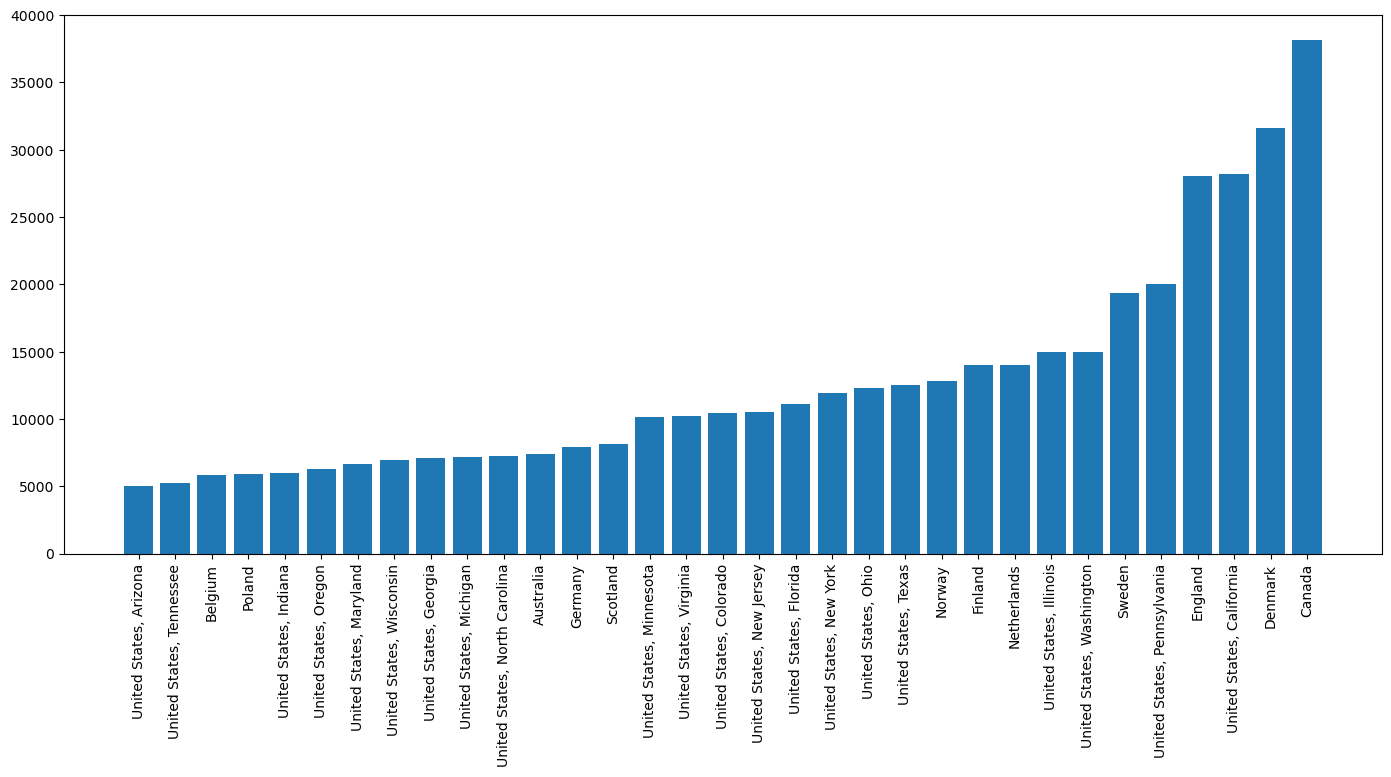

In [9]:
plot_country_distrbution(complete_IPA, threshold=5000)

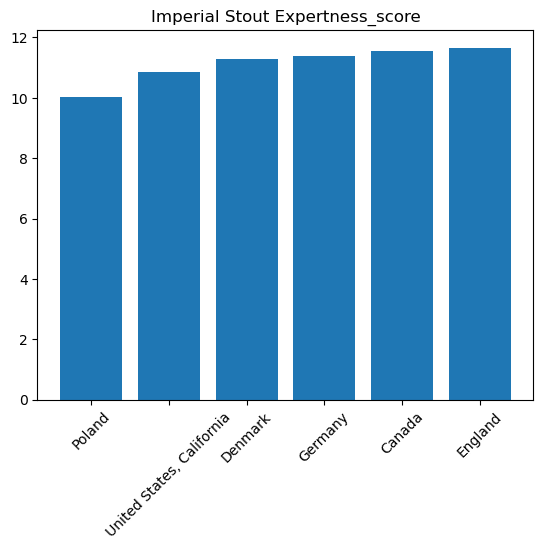

In [10]:
sel_countries = ['Canada', 'Denmark', 'England', 'United States, California', 'Germany', 'Poland']
plot_country_exp_score(complete_IPA, sel_countries)

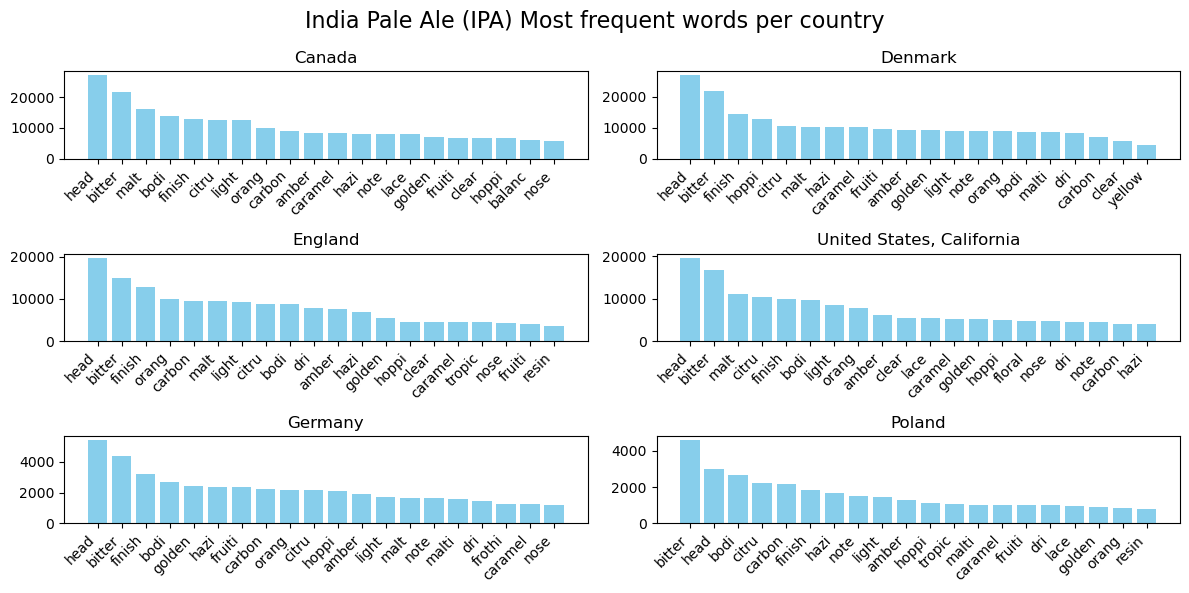

In [11]:
count_words_IPA = get_count_words(complete_IPA, sel_countries)
plot_count_words(count_words_IPA, style=Ipa_name)

## Analysis on Imperial Stout

In [12]:
IS_name='Imperial Stout'
rev_IS, complete_IS = get_style_dfs(IS_name, complete_beer, users_rb)

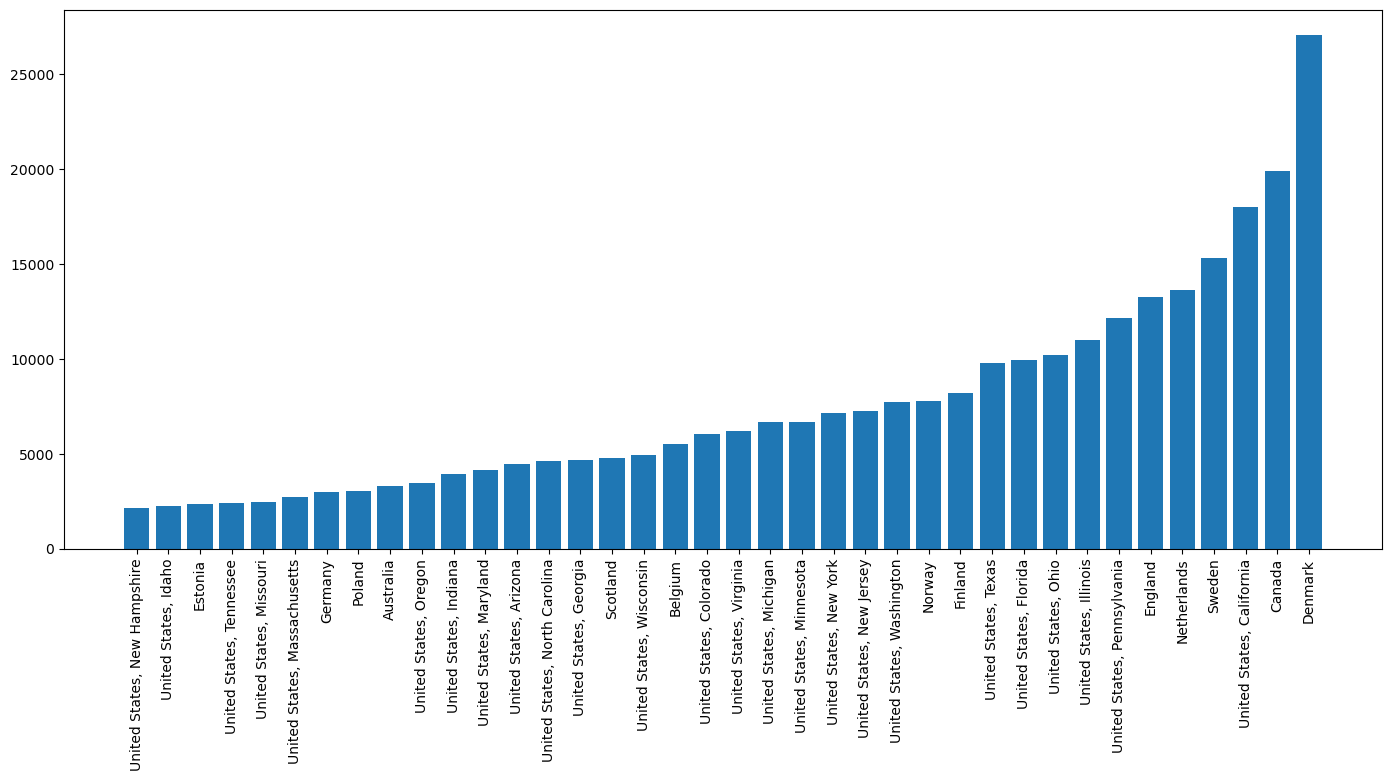

In [13]:
plot_country_distrbution(complete_IS, threshold=2000)

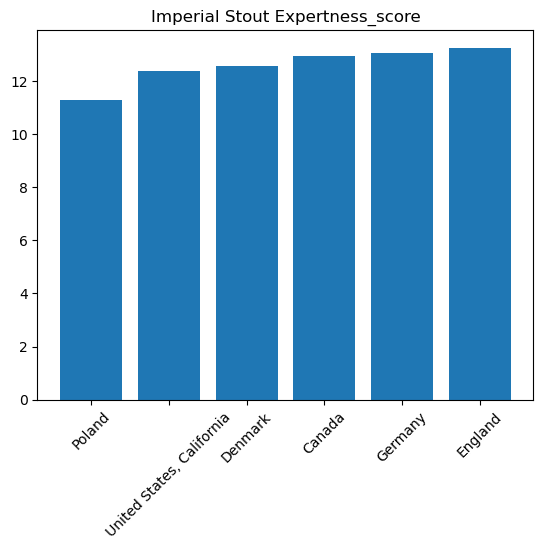

In [14]:
plot_country_exp_score(complete_IS, sel_countries)

In [15]:
count_words_IS =get_count_words(complete_IS, sel_countries)

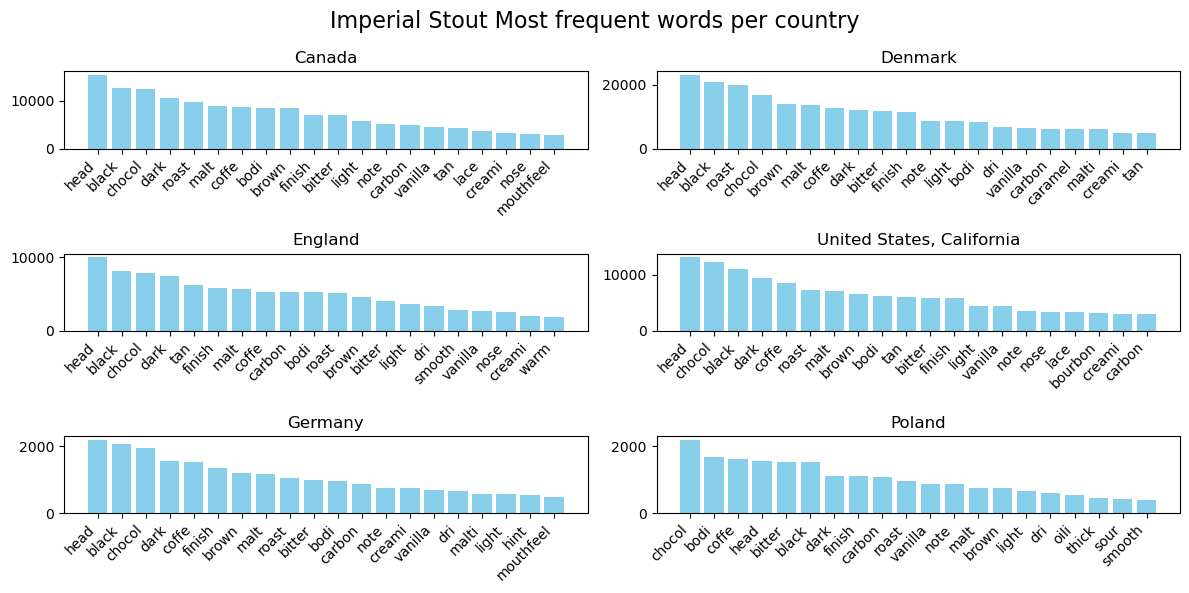

In [17]:
plot_count_words(count_words_IS, style=IS_name)

## Analysis on Pale Lager

In [19]:
PL_name = 'Pale Lager'
rev_PL, complete_PL = get_style_dfs(PL_name, complete_beer, users_rb)

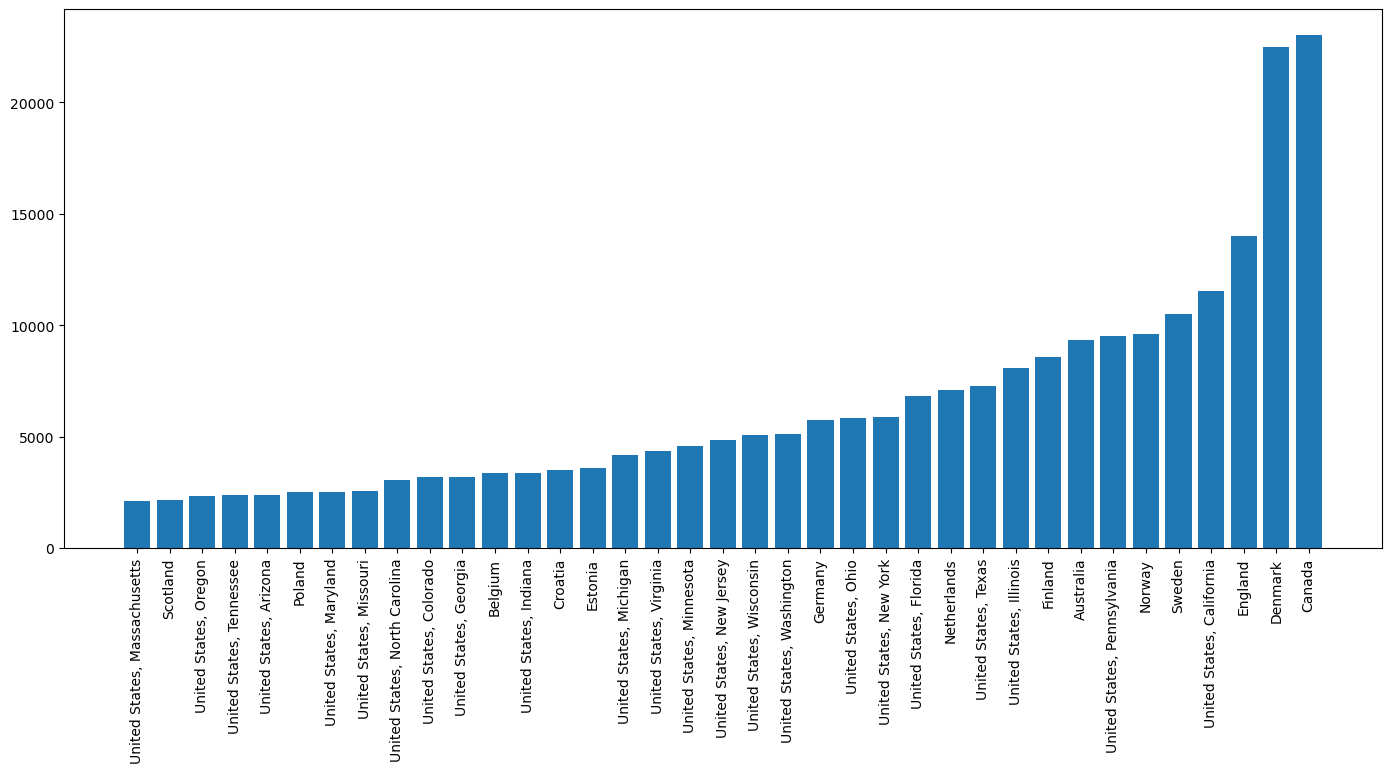

In [20]:
plot_country_distrbution(complete_PL)

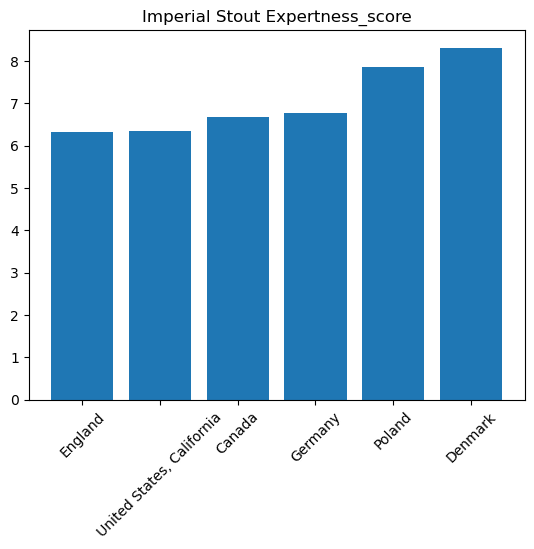

In [21]:
sel_countries = ['Canada', 'Denmark', 'England', 'United States, California', 'Germany', 'Poland']
plot_country_exp_score(complete_PL, sel_countries)

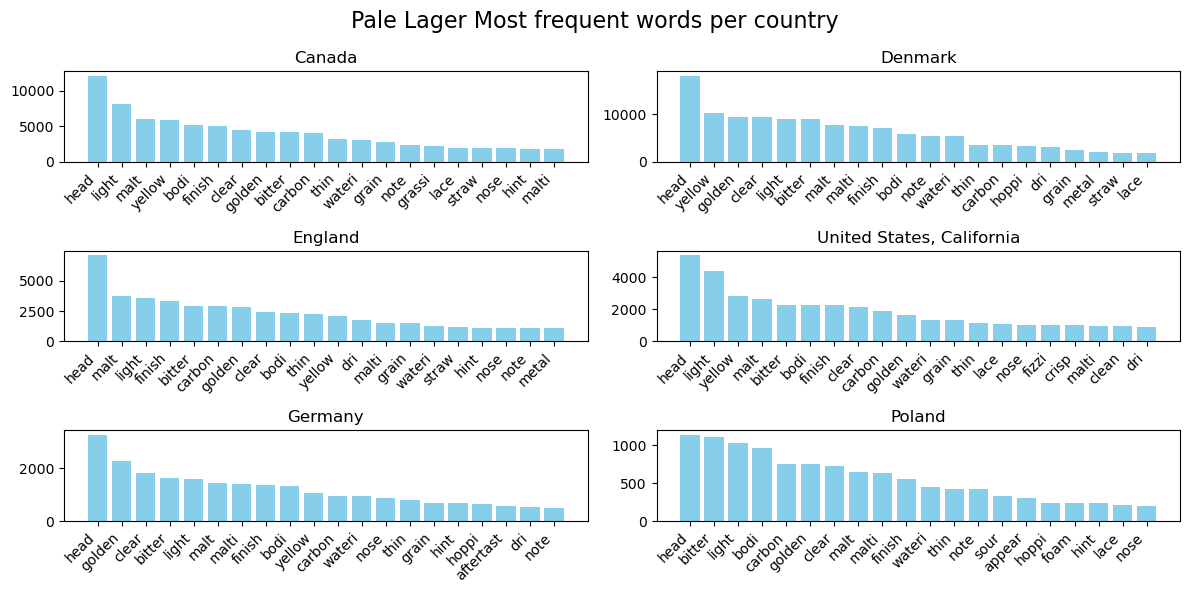

In [22]:
count_words = get_count_words(complete_PL, sel_countries)
plot_count_words(count_words, style='Pale Lager')